<a href="https://colab.research.google.com/github/Gcav66/AI_Intro_Builders_Workshop/blob/main/ai_intro_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The Features (X): [Action Score, Comedy Score]
X = np.array([
    [9, 2], [3, 8], [8, 1], [4, 9],  # Liked movies
    [2, 1], [1, 3], [4, 2], [3, 3]   # Disliked movies
])

# The Labels (y): 1 for "Liked", 0 for "Disliked"
y = np.array([1, 1, 1, 1, 0, 0, 0, 0])


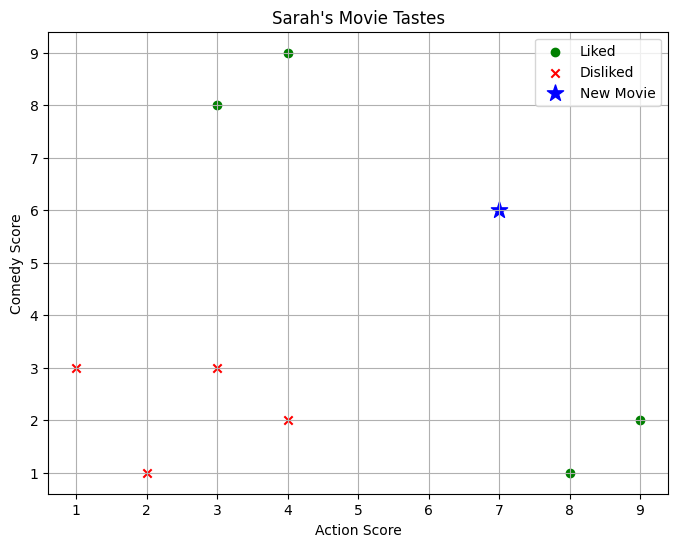

In [2]:
# The new, unknown movie we want to classify
new_movie = np.array([7, 6])

# --- Visualization ---
plt.figure(figsize=(8, 6))

# Plot the "Liked" movies in green
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', marker='o', label='Liked')

# Plot the "Disliked" movies in red
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', marker='x', label='Disliked')

# Plot the new movie as a blue star
plt.scatter(new_movie[0], new_movie[1], c='blue', marker='*', s=150, label='New Movie')

plt.title("Sarah's Movie Tastes")
plt.xlabel("Action Score")
plt.ylabel("Comedy Score")
plt.legend()
plt.grid(True)
plt.show()


In [3]:
# --- The Three Magic Lines for KNN ---

# 1. Import the model we want to use.
from sklearn.neighbors import KNeighborsClassifier

# 2. Instantiate the model.
# We choose K (the number of neighbors) to be 3.
model = KNeighborsClassifier(n_neighbors=3)

# 3. Fit the model to our data.
# For KNN, this step simply memorizes the data's location.
model.fit(X, y)

print("Training complete! The KNN model has stored the data.")


Training complete! The KNN model has stored the data.


In [4]:
# Our new movie data, reshaped for Scikit-learn
new_movie = np.array([[7, 6]])

# Use the trained model to make a prediction.
prediction = model.predict(new_movie)

# Let's print the result in a user-friendly way.
if prediction[0] == 1:
    print("Prediction: Sarah will LIKE this movie.")
else:
    print("Prediction: Sarah will DISLIKE this movie.")


Prediction: Sarah will LIKE this movie.


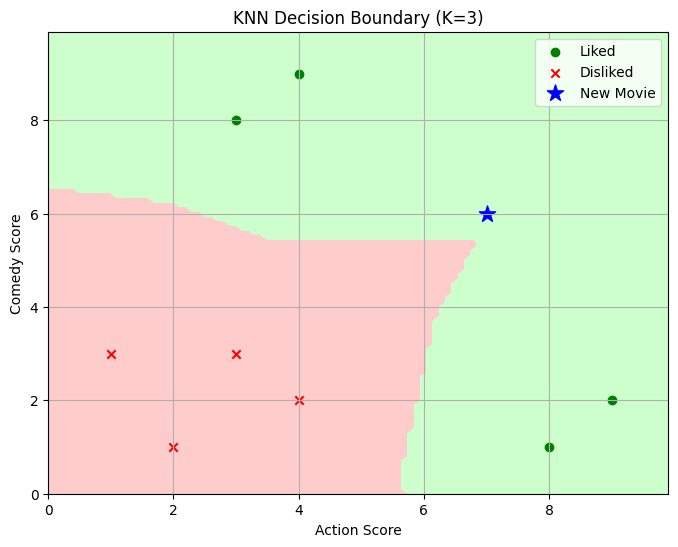

In [5]:
# (This code assumes you have run the previous examples)
from matplotlib.colors import ListedColormap

# Create a color map for the background
cmap_light = ListedColormap(['#FFCCCC', '#CCFFCC']) # Red and Green background colors

# Create a grid of points to classify
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get predictions for every point on the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# --- Plot the Decision Boundary ---
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot the original data points on top
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='green', marker='o', label='Liked')
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', marker='x', label='Disliked')
plt.scatter(new_movie[0,0], new_movie[0,1], c='blue', marker='*', s=150, label='New Movie')

plt.title("KNN Decision Boundary (K=3)")
plt.xlabel("Action Score")
plt.ylabel("Comedy Score")
plt.legend()
plt.grid(True)
plt.show()
